# Decission Tree Regression

Decision trees are a type of supervised learning technique that can be used for classification as well as regression. A tree operates by segmenting the data into smaller and smaller groups until each group can be classified or predicted with high degree of accuracy.

In [40]:
import os
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Dataset Generation

In [25]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

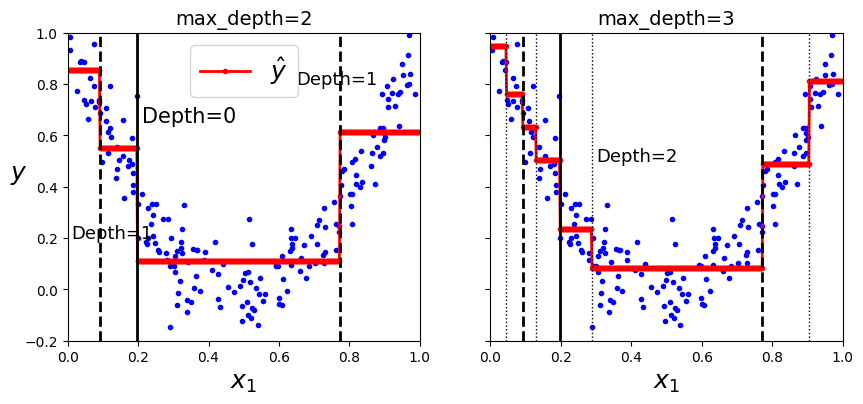

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

Regularization

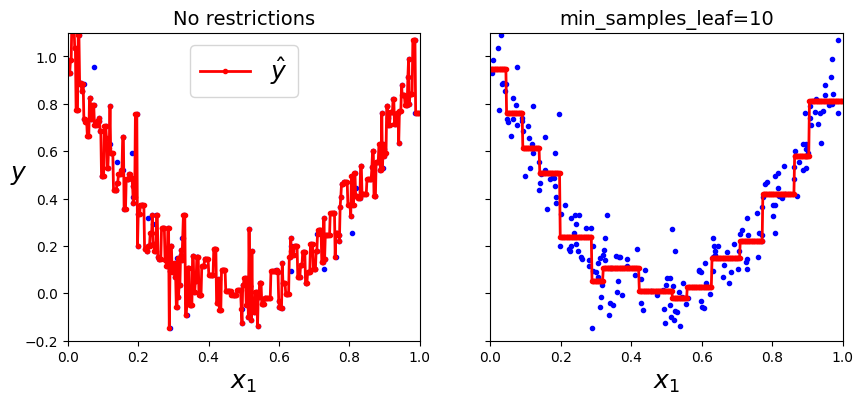

In [28]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## Real Data

In [29]:
df = pd.read_csv('../xdata/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [30]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

X= np.array(X).reshape(-1,1)
y= np.array(y).reshape(-1,1)

Data splitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scalling

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

## Model Training

In [33]:
model = DecisionTreeRegressor(random_state = 0)
model.fit(X,y)

DecisionTreeRegressor(random_state=0)

## Visualization

[Text(0.703125, 0.9285714285714286, 'x[0] <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(0.53125, 0.7857142857142857, 'x[0] <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(0.6171875, 0.8571428571428572, 'True  '),
 Text(0.375, 0.6428571428571429, 'x[0] <= 4.5\nsquared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(0.25, 0.5, 'x[0] <= 3.5\nsquared_error = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(0.1875, 0.35714285714285715, 'x[0] <= 2.5\nsquared_error = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(0.125, 0.21428571428571427, 'x[0] <= 1.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.0625, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.1875, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.25, 0.21428571428571427, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.3125, 0.35714285714285715, 'squ

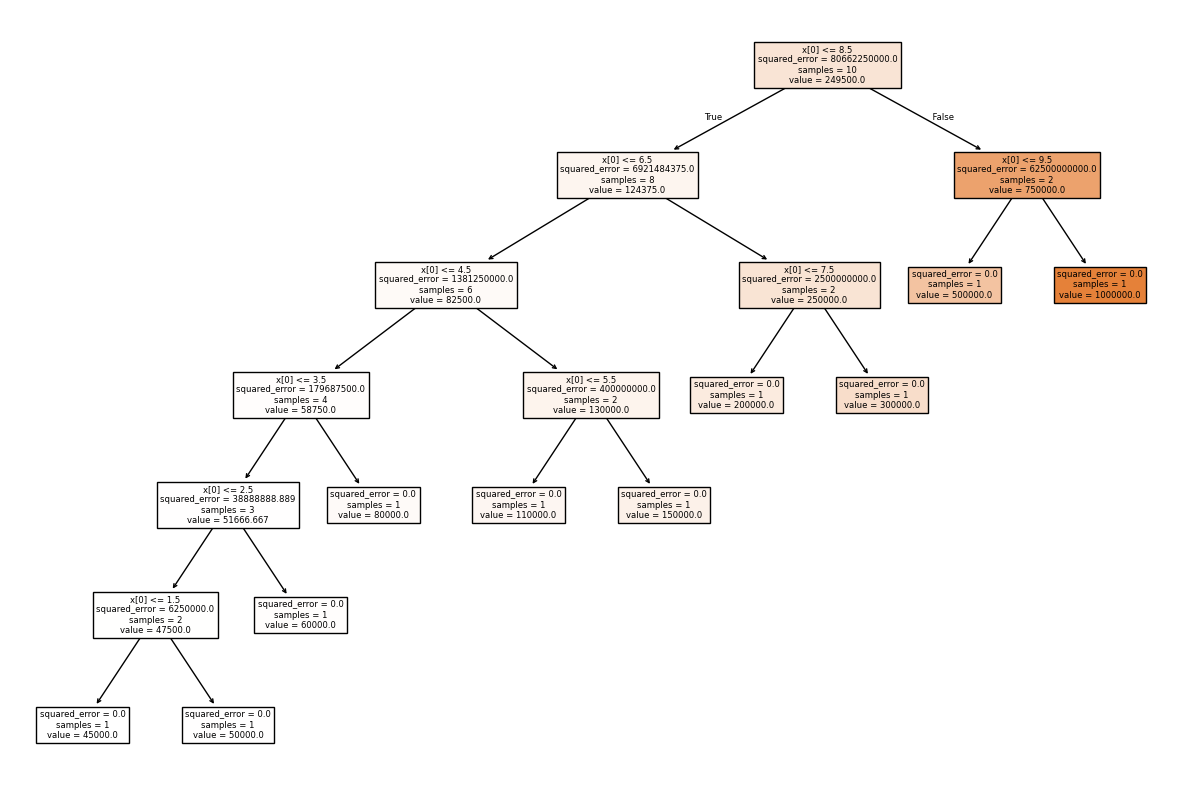

In [34]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

## Prediction

In [36]:
y_pred = model.predict([[6.5]])
y_pred

array([150000.])

## Evaluation

In [41]:
regression_model_mse = mean_squared_error(y_test,model.predict(X_test))
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",model.score(X,y))

Mean Squared Error:	 321908.37205639743
R squared value		 1.0


Visualize predictions

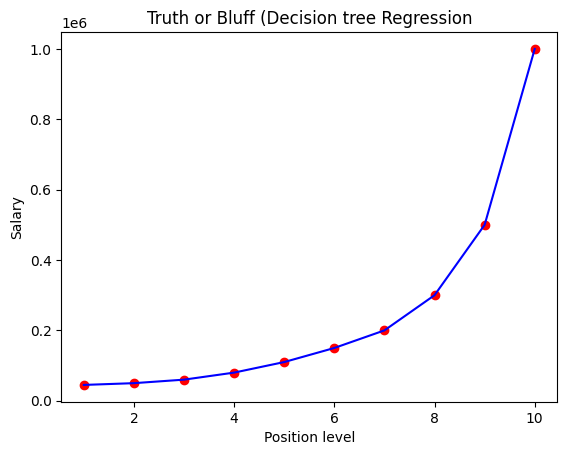

In [42]:
plt.scatter(X,y, color = 'red')
plt.plot(X, model.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()